In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
from datetime import datetime
import warnings
from celluloid import Camera # getting the camera
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
temp_city = pd.read_csv('./input/GlobalLandTemperaturesByCity.csv')
temp_country = pd.read_csv('./input/GlobalLandTemperaturesByCountry.csv')
temp_global = pd.read_csv('./input/GlobalTemperatures.csv')
ghg = pd.read_csv('./input/greenhouse_gas_inventory_data_data.csv')

In [4]:
def clean_data(df, temp):
    df = df[df[temp].notna()]
    df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)
    df['Year'] = df['dt'].dt.year
    df['Month'] = df['dt'].dt.month
    return df

In [5]:
temp_city = clean_data(temp_city, 'AverageTemperature')
temp_country = clean_data(temp_country, 'AverageTemperature')
temp_global = clean_data(temp_global, 'LandAverageTemperature')

## Is it getting warmer?

In [6]:
temp_global = temp_global.groupby(by=['Year']).mean().reset_index()
temp_global

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
0,1750,8.72,2.64,nan,nan,nan,nan,nan,nan,6.09
1,1751,7.98,2.78,nan,nan,nan,nan,nan,nan,4.71
2,1752,5.78,2.98,nan,nan,nan,nan,nan,nan,6.83
3,1753,8.39,3.18,nan,nan,nan,nan,nan,nan,6.50
4,1754,8.47,3.49,nan,nan,nan,nan,nan,nan,6.50
...,...,...,...,...,...,...,...,...,...,...
261,2011,9.52,0.08,15.28,0.11,3.83,0.14,15.77,0.06,6.50
262,2012,9.51,0.08,15.33,0.11,3.76,0.15,15.80,0.06,6.50
263,2013,9.61,0.10,15.37,0.12,3.91,0.15,15.85,0.06,6.50
264,2014,9.57,0.09,15.31,0.11,3.88,0.14,15.91,0.06,6.50


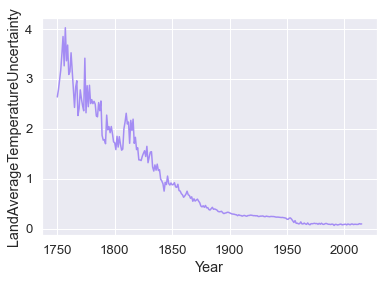

In [7]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=temp_global.Year, y = temp_global.LandAverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

In [8]:
#temp_global = temp_global[temp_global.Year>=1850]

NameError: name 'min_year' is not defined

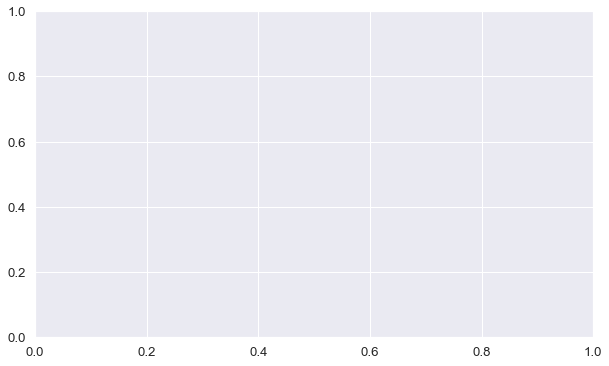

In [9]:
fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger

plt.xlim(min_year, max_year)
ax.grid(False)
ax.set_ylabel('Average Temperature / Uncertainty')
ax.set_xlabel('Year')
ax.set_title('Average Land Temperature (& its Uncertainty) on Earth 1850-2015')

camera = Camera(fig)# the camera gets our figure
x = temp_global.Year
y1 = temp_global.LandAverageTemperature
y2 = temp_global.LandAverageTemperatureUncertainty
for i in range(len(x)):
    x_t = x[:i] # current year
    y_t1 = y1[:i] # current temp
    y_t2 = y2[:i] # current temp error
    ax.plot(x_t, y_t1, c='blue')
    ax.plot(x_t, y_t2, c='red')
    camera.snap()

ax.legend(['Average Temperature','Temperature Uncertainty'], loc='left')
animation = camera.animate(interval=10, repeat = False)
plt.close() #Stop the empty plot from displaying
animation.save('global_temp.gif', writer='pillow')
HTML(animation.to_html5_video())

In [ ]:
#temp_country.Country.value_counts()
#temp_city.shape
#temp_city.describe()
#temp_city['temp_top'] = temp_city['AverageTemperature'] + temp_city['AverageTemperatureUncertainty']
#temp_city['temp_bottom'] = temp_city['AverageTemperature'] - temp_city['AverageTemperatureUncertainty']

## What about Greece?

In [ ]:
ghg_greece = ghg[ghg['country_or_area']=='Greece']

In [ ]:
ghg_greece

In [ ]:
ghg_greece = ghg_greece.groupby(by=['year']).sum().reset_index()
ghg_greece

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=global_ghg.year, y = global_ghg.value, 
                 ci = None, color =clrs[3])
plt.xlim(1990, 2014)
ax.grid(False)
ax.set_ylabel('GHG in Greece')
ax.set_xlabel('Year')
ax.set_title('GHG in Greece')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ghg = ghg.groupby(by=['year', 'country_or_area']).sum().reset_index()

In [ ]:
ghg

In [ ]:
keep_cols = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Month']
gr = temp_country[temp_country.Country == 'Greece'][keep_cols]
gr

In [ ]:
#gr = temp_city[temp_city['Country'] == 'Greece']

In [ ]:
gr.describe()

In [ ]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=gr.Year, y = gr.AverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

In [ ]:
title = 'Average Temperature in Greece'

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()
#plt.plot(, 30) 

In [ ]:
gr = gr[gr.Year>=1850]

In [ ]:
def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

In [ ]:
min_year = gr['Year'].min()
max_year = gr['Year'].max()
years = range(min_year, max_year + 1)

In [ ]:
gr['season'] = gr['Month'].apply(get_season)

In [ ]:
title = 'Average Temperature in Greece'
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()

## Are all seasons affected the same? 

In [ ]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

In [ ]:
title = 'Average Temperature per Season in Greece (1850-2013)'
sns.relplot(data=gr, x="Year", y="AverageTemperature", hue="season", ci= None, 
            height=5, aspect=2.4, kind="line").set(title=title)
#t = plt.plot(range(i, i + 5))

#plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(min_year, max_year)

In [ ]:
gr

In [ ]:
gr = gr.groupby(by=['Year', 'season']).mean().reset_index()

In [ ]:
gr

    fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
    camera = Camera(fig)# the camera gets our figure

    x = gr.Year
    y = gr.AverageTemperature
    for i in range(len(x)):
        x_t = x[:i] # current year
        y_t = y[:i] # current temp
        sns.relplot(data=gr, x="Year", y="AverageTemperature", hue="season", ci= None, 
                height=5, aspect=2.4, kind="line").set(title=title)
        camera.snap()
    animation = camera.animate(blit=False, interval=20)
    plt.close() #Stop the empty plot from displaying
    animation.save('gr_temp_seasons.gif', writer='pillow')
    HTML(animation.to_html5_video())

In [ ]:
gr = gr.groupby(by=['Year','season']).mean()
gr

In [ ]:
gr = gr[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [ ]:
#from scipy.interpolate import make_interp_spline
#a_BSpline = make_interp_spline(list(data.index), list(data[season]))
#y_new = a_BSpline(data.index)

    plt.figure(figsize=(18,8))
    sns.set(font_scale=2)
    ax = sns.violinplot(data=data, order = seasons)
    #ax.set(xlabel='Platforms', ylabel='User Score', title='Best-Selling Consoles: Critic Scores')
    plt.show()

In [ ]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6))

data = gr.unstack(level=1).AverageTemperature
for season in ['Winter', 'Autumn', 'Spring', 'Summer']:
    sns.lineplot(data = data[season], label=season)
plt.xlim(min_year, max_year)
ax.grid(False)
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Year')
ax.set_title('Average Temperature per Season in Greece')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #sns.set(style="whitegrid")
    sns.set(style="ticks")
    f, axes = plt.subplots(4,1, figsize = (10, 10))
    data = gr_ath.unstack(level=1).AverageTemperature
    for num, season in enumerate(seasons):
        sns.lineplot(ax = axes[num], data = data[season],label=season, linewidth=1)

    #dataset for every city to greece
    gr_ath = gr[gr['City'] == 'Athens']
    gr_thes = gr[gr['City'] =='Thessaloníki']
    gr_lar = gr[gr['City'] == 'Lárisa']
    gr_patra = gr[gr['City'] == 'Pátrai']